In [12]:
library(tidyverse)
library(ggplot2)

theme_set(theme_minimal())

In [3]:
players <- read_csv("players.csv")
head(players)

nrow(players)
ncol(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

[1] 7

In [4]:
glimpse(players)
summary(players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

mean_played_hours,mean_age,median_played_hours,total_players,subscribe_count,percentage_subscribe
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,0.1,196,144,73.47


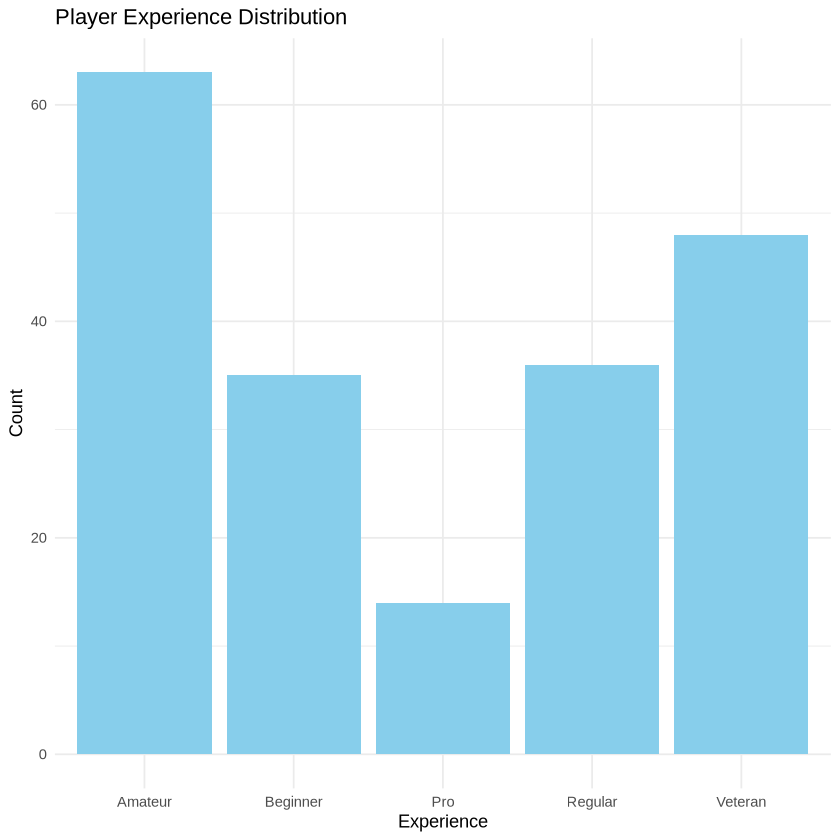

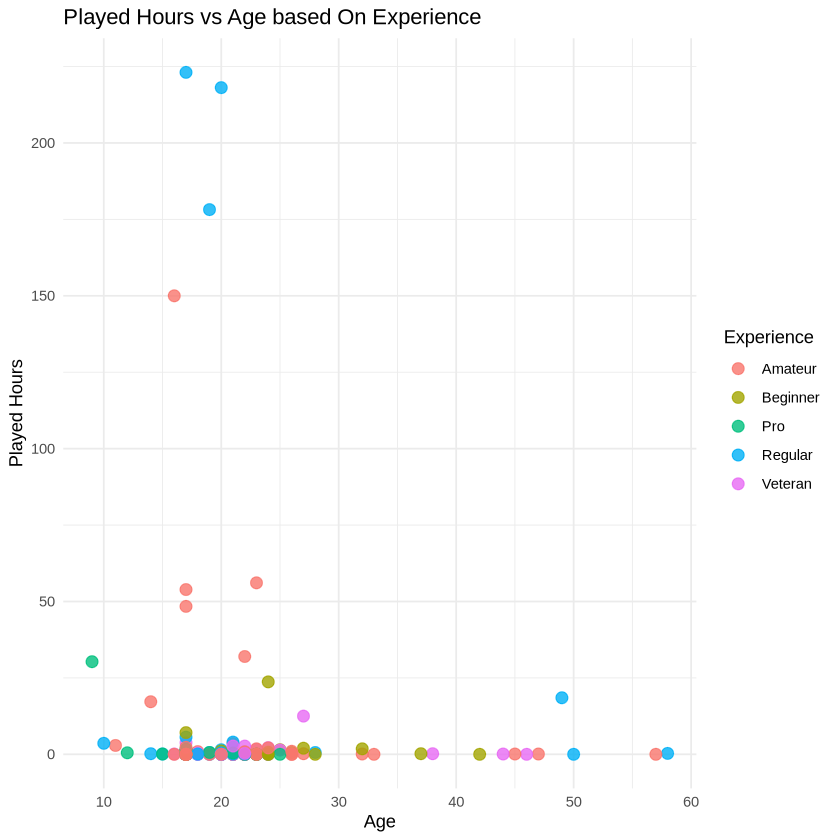

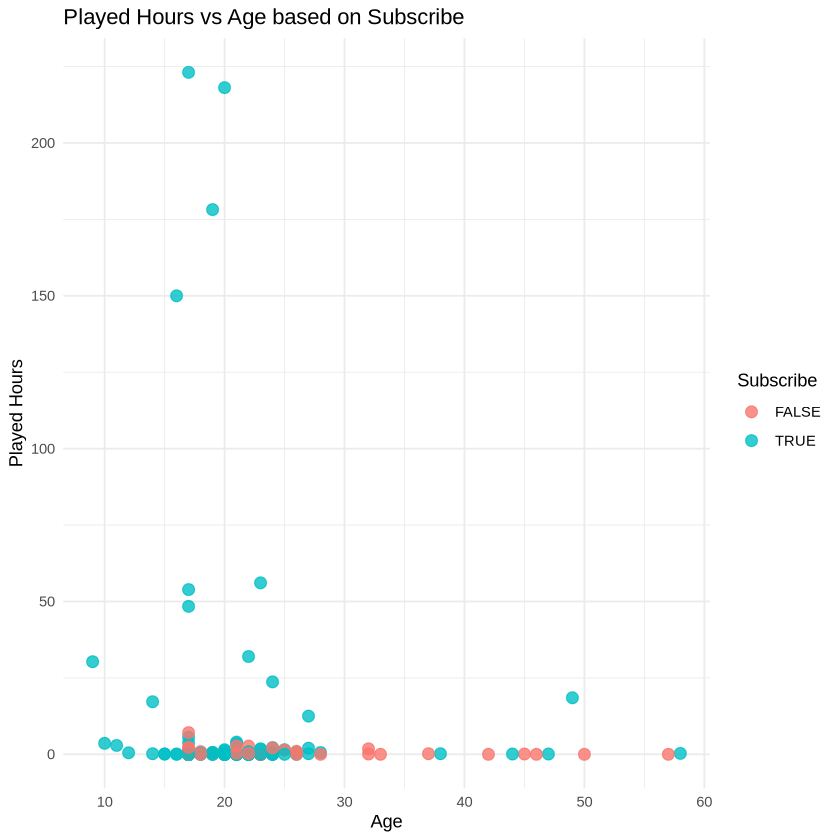

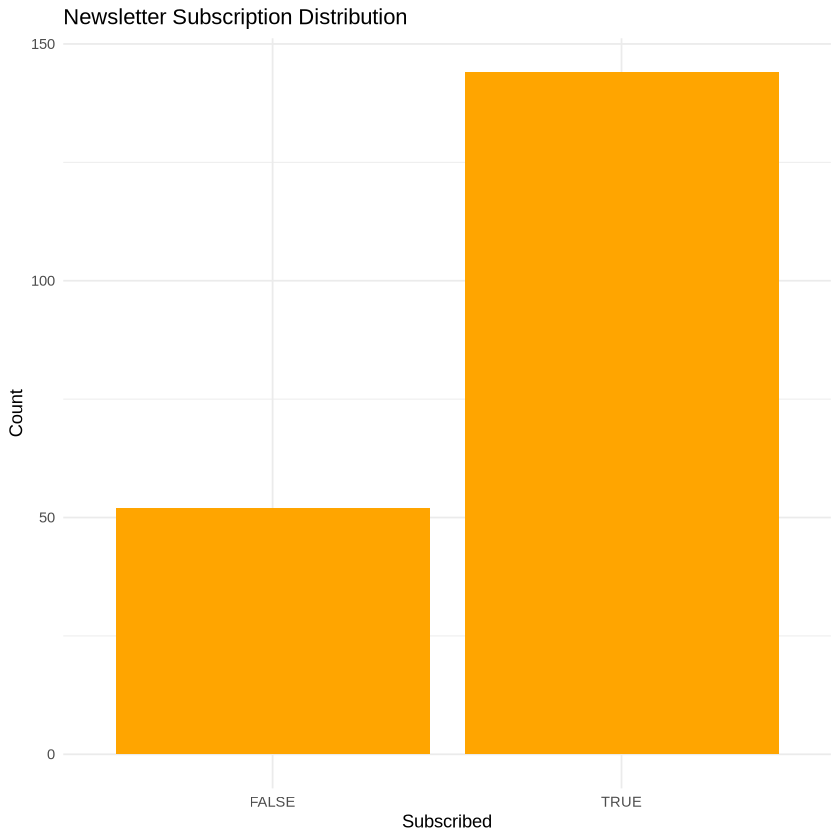

In [19]:
players %>% summarise(
  mean_played_hours = mean(played_hours, na.rm = TRUE),
  mean_age = mean(Age, na.rm = TRUE), 
  median_played_hours = median(played_hours, na.rm = TRUE),
  total_players = n(),
  subscribe_count = sum(subscribe == "TRUE", na.rm = TRUE),
  percentage_subscribe = subscribe_count / total_players * 100) %>%
  round(2)

ggplot(players, aes(x = experience)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Player Experience Distribution", x = "Experience", y = "Count")

ggplot(players, aes(x = Age, y = played_hours, color = experience)) +
  geom_point(size = 3, na.rm = TRUE, alpha = 0.8) +
  labs(title = "Played Hours vs Age based On Experience", x = "Age", y = "Played Hours", color = "Experience")

ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 3, na.rm = TRUE, alpha = 0.8) +
  labs(title = "Played Hours vs Age based on Subscribe", x = "Age", y = "Played Hours", color = "Subscribe")

ggplot(players, aes(x = subscribe)) +
  geom_bar(fill = "orange") +
  labs(title = "Newsletter Subscription Distribution", x = "Subscribed", y = "Count")

## 1. Data Description

### players.csv
- **Number of observations: 196**
- **Number of variables: 7**
- **Description:** Contains player demographic and behavioral information.

| Variable       | Type        | Description                                                      | Issues                                   |
| -------------- | ----------- | ---------------------------------------------------------------- | ----------------------------------------------- |
| `hashedEmail`  | Character   | Unique anonymous player identifier                               | Used to merge with sessions data                |
| `experience`   | Categorical | Player’s experience level (e.g., Amateur, Regular, Pro, Veteran) | Uneven distribution possible                    |
| `subscribe`    | Logical     | TRUE = subscribed, FALSE = not subscribed                        | Could be used as target variable                |
| `played_hours` | Numeric     | Total gameplay hours                                             | Right-skewed; some extreme outliers (max 223.1) |
| `name`         | Character   | Player nickname                                                  | Not useful for analysis                         |
| `gender`       | Categorical | Reported gender (Male/Female)                                    | May contain imbalance                           |
| `Age`          | Numeric     | Player’s age                                                     | Two missing values detected                     |

### Summary statistics
- Mean played hours = 5.85 hours
- Median played hours = 0.1 hours → indicates many players played very little
- Mean age = 21.14 years
- 144 of 196 players (≈73%) subscribed to the newsletter.

### Potential Data Issues
- Missing demographic information (e.g., 2 missing ages, potential gender imbalance).
- Highly skewed distribution of played_hours. Many players played very few hours
- Potential data imbalance in the subscribe variable (many TRUE values).
- Bias in participation (some players may be overrepresented).

## 2. Questions

#### Broad Question
What player characteristics and behaviors are most predictive of subscribing to the game newsletter?
#### Specific Question
Can player experience, total played hours, and age predict whether a player subscribes to the newsletter?


## 3. Exploratory Data Analysis and Visualization

#### Mean Value for Each Quantitative Variable
| Variable         | Mean Value |
|------------------|-------------|
| Played Hours     | 5.85        |
| Age              | 21.14       |

Interpretation  
- The average played hours among players is 5.85 hours.  
- The average player age is 21.14 years, suggesting a relatively young player group.

#### Player Experience Distribution
- Most players are Amateurs, followed by Veterans, Regular, Beginner, and Pro.
- Indicates the majority are casual players.
- Order: Amateur > Veteran > Regular > Beginner > Pro

#### Relationship between Age and Played Hours
- The relationship between Age and Played Hours is weak to moderate.
- Younger players (9–30) show higher variation in played hours.
- Older players (>30) usually play less than 5 hours.

#### Played Hours vs Age (Colored by Subscription)
- Most subscribed players are between 10–30 years old and tend to play more hours.
- Non-subscribed players cluster at lower playtime, suggesting engagement affects subscription likelihood.

#### Newsletter Subscription Distribution
- 144 of 196 players subscribed
- Indicates class imbalance in the target variable (subscribe).

#### Conclusion 
- Casual (amateur) players dominate the dataset.
- Age does not strongly predict playing time.
- Subscription variable is imbalanced and should be handled carefully during modeling.

## 4. Methods and Plan

### Planned Method
I plan to use the Logistic Regression model to predict newsletter subscription based on `experience`, `played_hours`, and `Age`.

#### Why this method?
- The response variable (`subscribe`) is binary (TRUE/FALSE), which fits logistic regression.
- It allows interpretation of how each variable affects the probability of subscribing.

#### Assumptions
- Observations are independent.
- Relationship between predictors and log-odds of outcome is linear.

#### Limitations
- Cannot capture non-linear relationships unless transformed.
- Sensitive to outliers and imbalanced classes (since most players may be subscribed).

#### Model Comparison and Selection
- Compare Logistic Regression with a k-Nearest Neighbors (k-NN) classifier to test whether a non-parametric approach performs better.
- Use k-fold cross-validation (k = 5) to tune and validate model.

#### Data Processing Plan
- Data Cleaning to handle missing values (missing age).
- Data Splitting: 70% training, 30% testing. Use set.seed(2000) for reproducibility.
- Standardize numeric predictors (Age, played_hours) before using k-NN 
- Fit and evaluate logistic regression with cross-validation.  
- Evaluate using accuracy, precision, and recall.

## GitHub Repository
Link: https://github.com/NiMadeChandra/Group5_NiMadeChandra.git